In [38]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_28072e683f8048ada2ea989ee1c90904.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [16]:
df.shape

(615, 13)

In [2]:
df=df.drop(["Unnamed: 0"],axis=1)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df.isna().any()

Category    False
Age         False
Sex         False
ALB          True
ALP          True
ALT          True
AST         False
BIL         False
CHE         False
CHOL         True
CREA        False
GGT         False
PROT         True
dtype: bool

In [4]:
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [5]:
df=df.fillna(df.median())
df.isna().any()

Category    False
Age         False
Sex         False
ALB         False
ALP         False
ALT         False
AST         False
BIL         False
CHE         False
CHOL        False
CREA        False
GGT         False
PROT        False
dtype: bool

In [6]:
df.groupby("Category").count().T

Category,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
Age,533,7,24,21,30
Sex,533,7,24,21,30
ALB,533,7,24,21,30
ALP,533,7,24,21,30
ALT,533,7,24,21,30
AST,533,7,24,21,30
BIL,533,7,24,21,30
CHE,533,7,24,21,30
CHOL,533,7,24,21,30
CREA,533,7,24,21,30


In [17]:
533/615

0.8666666666666667

In [7]:
X=df.drop(["Category"],axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
gender=X[["Sex"]]
gender=pd.DataFrame(le.fit_transform(gender)).rename(columns={0:"Sex"})
gender.head()

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Sex
0,1
1,1
2,1
3,1
4,1


In [9]:
X=X.drop(["Sex"],axis=1)
X=pd.concat([gender,X],axis=1)
X.head()

,Sex,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,1,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,1,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,1,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Sex,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.794544,-1.533616,-0.540739,-0.613566,-0.815675,-0.383693,-0.198236,-0.574734,-1.903634,0.497070,-0.502286,-0.564419
1,0.794544,-1.533616,-0.540739,0.081055,-0.410629,-0.305057,-0.381375,1.349161,-0.505077,-0.146590,-0.438203,0.826054
2,0.794544,-1.533616,0.914755,0.252759,0.305084,0.538767,-0.269457,0.291926,-0.148756,0.094783,-0.115957,1.345164
3,0.794544,-1.533616,0.273645,-0.633077,0.084865,-0.368571,0.381706,-0.393234,-0.558525,-0.025903,-0.104971,0.677737
4,0.794544,-1.533616,-0.419448,0.229345,0.163515,-0.302033,-0.091404,0.432588,-0.932661,-0.106361,-0.176378,-0.620038


In [11]:
y=df[["Category"]]
y.head()

,Category
0,0=Blood Donor
1,0=Blood Donor
2,0=Blood Donor
3,0=Blood Donor
4,0=Blood Donor


In [12]:
y=pd.DataFrame(le.fit_transform(y)).rename(columns={0:"Category"})
y.head()

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Category
0,0
1,0
2,0
3,0
4,0


In [13]:
from imblearn.ensemble import BalancedRandomForestClassifier
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [14]:
BForest=BalancedRandomForestClassifier(n_estimators=210,criterion="entropy",max_depth=5,min_samples_split=5,min_samples_leaf=4,max_features="sqrt",bootstrap=False,sampling_strategy="not majority",replacement=False,n_jobs=-1,warm_start=False,class_weight="balanced",random_state=0).fit(X,y)
scores=cross_val_score(BForest,X,np.asarray(y).reshape(y.shape[0],),cv=10)
print("Accuracy: ",scores.mean())

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy:  0.9267054468535166


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


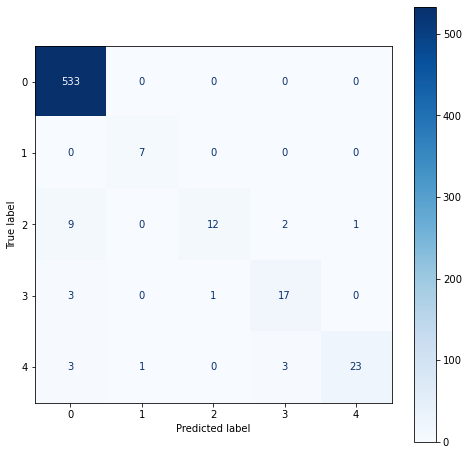

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
y_pred = cross_val_predict(BForest, X, np.asarray(y).reshape(y.shape[0],), cv=10)
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(BForest,X,y,cmap=plt.cm.Blues, ax=ax)
plt.show()

That's quite commendable already. Category 1, "Suspect Blood Donor" has only 7 instances, the smallest class in the dataset, but the model correctly classified all of them. Let's see if we can do even better.

In [43]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown='ignore')
y_true=pd.DataFrame((enc.fit_transform(y).toarray()))
y_true.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [44]:
pip install tensorflow

     |████████████████████████████████| 320.4 MB 31 kB/s s eta 0:00:01
     |████████████████████████████████| 65 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 459 kB 56.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 63.2 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 61.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 60.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 58.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 127 kB 52.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 96 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 72.5 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 40.3 MB/s eta 0:00:01
     |█████████████████████████████

In [45]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

np.random.seed(0)

In [47]:
length=X.shape[1]
length

12

In [49]:
num_classes=y_true.shape[1]
num_classes

5

In [144]:
def classification_model():
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.3))
    #0.3
    #model.add(Dense(60, activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    opt=Adam(lr=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [145]:
neural_network = KerasClassifier(build_fn=classification_model, 
                                 epochs=30, 
                                 verbose=0)

In [146]:
scores=cross_val_score(neural_network, X, y_true, cv=16)

In [147]:
print("Accuracy: ",scores.mean())

Accuracy:  0.8669028324075043


The BalancedRandomForestClassifier model clearly outperformed the Neural Network model.